### 
In this notebook we will be doing some sentiment analysis in python using two different techniques:

1) VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
2) Roberta Pretrained Model from 🤗
3) Huggingface Pipeline

Step 1) Reading data and NLTK basics

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

plt.style.use('ggplot')




In [ ]:
# Reading data
df = pd.read_csv('Reviews.csv')     

# Exploring data
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [14]:
df.shape


(568454, 10)

In [15]:
# taking a sample of 500 reviews
df500 = df.head(500)

# Exploring the sample
df500.head()
df500.shape


(500, 10)

## Quick EDA

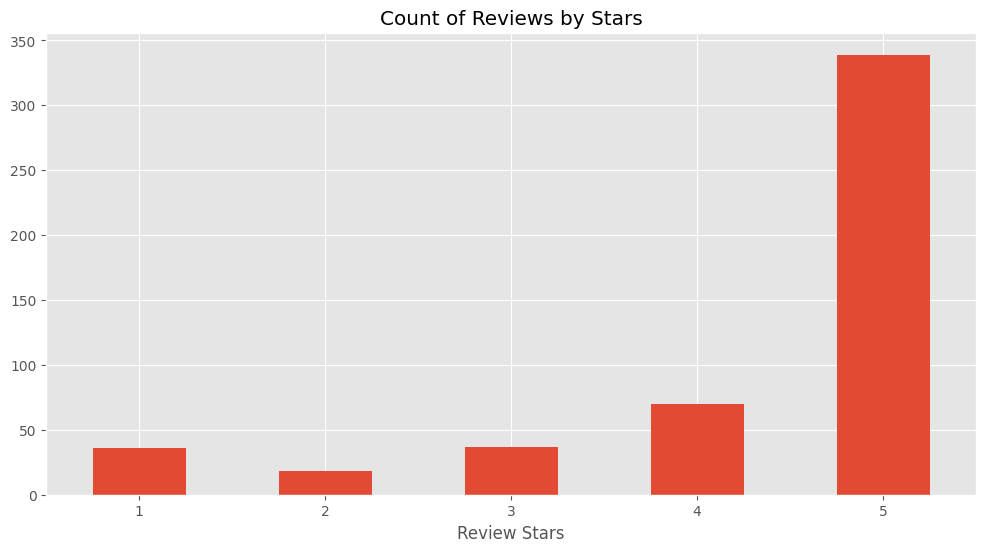

In [16]:
ax = df500['Score'].value_counts().sort_index() \
    .plot(kind='bar', 
          title='Count of Reviews by Stars', 
          figsize=(12,6))
ax.set_xlabel('Review Stars')
plt.xticks(rotation=0)
plt.show()


## Basic NLTK

In [17]:
example = df['Text'].values[50]
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [18]:
tokens = nltk.word_tokenize(example)


In [19]:
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [20]:
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Checkout\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Checkout\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Checkout\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Checkout\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Checkout\AppData\Roaming

True

In [21]:

tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [22]:
entities =  nltk.chunk.ne_chunk(tagged)
entities.pprint()


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


Step 2) VADER Seniment Scoring
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

-This uses a "bag of words" approach:
    i) Stop words are removed
    ii) each word is scored and combined to a total score.

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()




In [24]:
sia.polarity_scores('I am so happy!')


{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [25]:
sia.polarity_scores('This is the worst thing ever.')


{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [26]:
sia.polarity_scores(example)


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [27]:
df500.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [28]:
# Run the polarity score on the dataset with 500 reviews
results = []
for row in df500['Text']:
    polar = sia.polarity_scores(row)
    polar['review'] = row
    results.append(polar)




In [29]:
results[:5]


[{'neg': 0.0,
  'neu': 0.695,
  'pos': 0.305,
  'compound': 0.9441,
  'review': 'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'},
 {'neg': 0.138,
  'neu': 0.862,
  'pos': 0.0,
  'compound': -0.5664,
  'review': 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'},
 {'neg': 0.091,
  'neu': 0.754,
  'pos': 0.155,
  'compound': 0.8265,
  'review': 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I high

In [30]:
pd.DataFrame(results)


,neg,neu,pos,compound,review
0,0.000,0.695,0.305,0.9441,I have bought several of the Vitality canned d...
1,0.138,0.862,0.000,-0.5664,Product arrived labeled as Jumbo Salted Peanut...
2,0.091,0.754,0.155,0.8265,This is a confection that has been around a fe...
3,0.000,1.000,0.000,0.0000,If you are looking for the secret ingredient i...
4,0.000,0.552,0.448,0.9468,Great taffy at a great price. There was a wid...
...,...,...,...,...,...
495,0.000,0.554,0.446,0.9725,i rarely eat chips but i saw these and tried t...
496,0.059,0.799,0.142,0.7833,This is easily the best potato chip that I hav...
497,0.025,0.762,0.212,0.9848,Kettle Chips Spicy Thai potato chips have the ...
498,0.041,0.904,0.055,0.1280,"Okay, I should not eat potato chips, nor shoul..."


In [31]:
vaders = pd.DataFrame(results)
# Merge the VADER sentiment scores with the original df500 DataFrame
# Selecting just the sentiment columns from vaders and reordering columns
sentiment_columns = vaders[['neg', 'neu', 'pos', 'compound']]
vaders = pd.concat([sentiment_columns, df500], axis=1)


In [32]:
vaders.head(2)


,neg,neu,pos,compound,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0.000,0.695,0.305,0.9441,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0.138,0.862,0.000,-0.5664,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [33]:
# Reorder columns to move Id first
cols = vaders.columns.tolist()
cols = ['Id'] + [col for col in cols if col != 'Id']
vaders = vaders[cols]

In [34]:
# The new dataframe has the sentiment scores and the original review text
vaders.head(2)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


## Bar plot of vaders

C:\Users\Checkout\AppData\Local\Temp\ipykernel_10192\1401880286.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=vaders, x='Score', y='compound', palette='viridis')


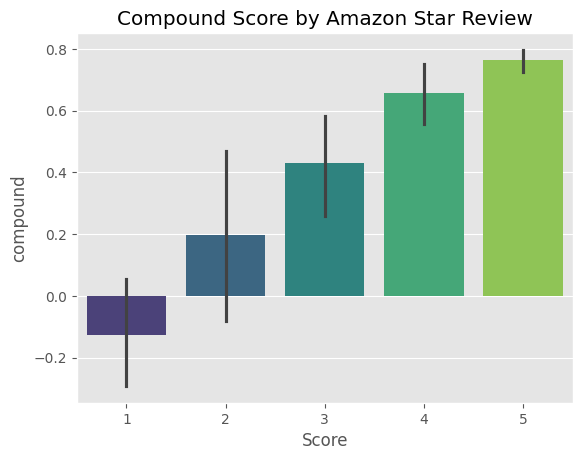

In [35]:
ax = sns.barplot(data=vaders, x='Score', y='compound', palette='viridis')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()


C:\Users\Checkout\AppData\Local\Temp\ipykernel_10192\3357792633.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Score', y='pos', ax=ax[0], palette='viridis')
C:\Users\Checkout\AppData\Local\Temp\ipykernel_10192\3357792633.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Score', y='neu', ax=ax[1], palette='viridis')
C:\Users\Checkout\AppData\Local\Temp\ipykernel_10192\3357792633.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Score', y='neg', ax=ax[2], palette='viridis')


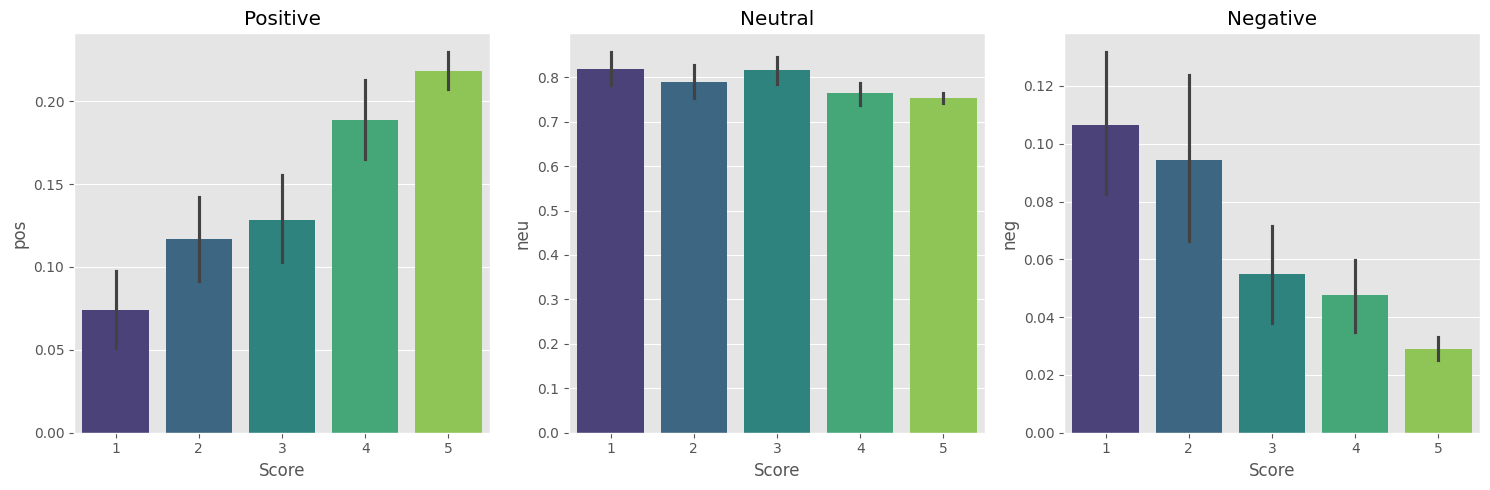

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vaders, x='Score', y='pos', ax=ax[0], palette='viridis')
sns.barplot(data=vaders, x='Score', y='neu', ax=ax[1], palette='viridis')
sns.barplot(data=vaders, x='Score', y='neg', ax=ax[2], palette='viridis')
ax[0].set_title('Positive')
ax[1].set_title('Neutral')
ax[2].set_title('Negative')
plt.tight_layout()
plt.show()


C:\Users\Checkout\AppData\Local\Temp\ipykernel_10192\3763733184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Score', y='pos', ax=ax[0], palette='viridis')
C:\Users\Checkout\AppData\Local\Temp\ipykernel_10192\3763733184.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Score', y='neu', ax=ax[1], palette='viridis')
C:\Users\Checkout\AppData\Local\Temp\ipykernel_10192\3763733184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Score', y='neg', ax=ax[2], palette='viridis')


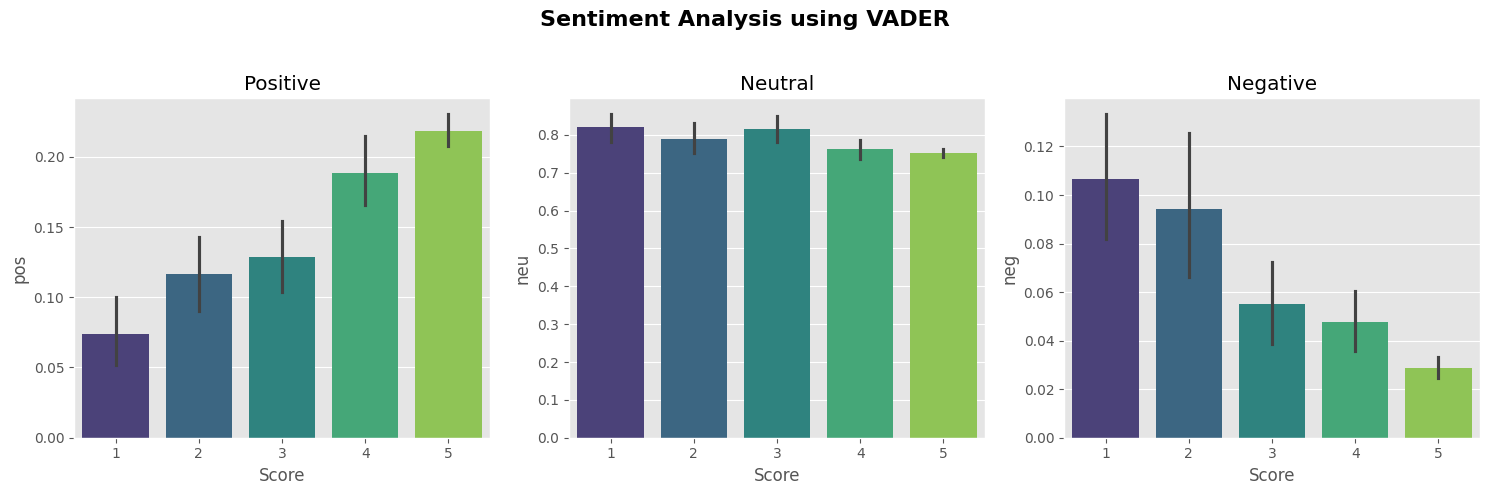

In [108]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vaders, x='Score', y='pos', ax=ax[0], palette='viridis')
sns.barplot(data=vaders, x='Score', y='neu', ax=ax[1], palette='viridis')
sns.barplot(data=vaders, x='Score', y='neg', ax=ax[2], palette='viridis')
ax[0].set_title('Positive')
ax[1].set_title('Neutral')
ax[2].set_title('Negative')

# Setting the main title for the entire figure
fig.suptitle('Sentiment Analysis using VADER', fontsize=16, fontweight='bold')

# Layout adjustments
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to fit main title properly
plt.show()

In [37]:
df.head(2)
df.shape

(568454, 10)

In [38]:
# doing the same for the entire dataset
df[['neg', 'neu', 'pos', 'compound']] = df['Text'].apply(lambda x: pd.Series(sia.polarity_scores(x)))


In [39]:
df.head(2)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664


In [40]:
df['Sentiment'] = df['compound'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

In [41]:
df.head(2)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664,negative


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      568454 non-null  int64  
 1   ProductId               568454 non-null  object 
 2   UserId                  568454 non-null  object 
 3   ProfileName             568428 non-null  object 
 4   HelpfulnessNumerator    568454 non-null  int64  
 5   HelpfulnessDenominator  568454 non-null  int64  
 6   Score                   568454 non-null  int64  
 7   Time                    568454 non-null  int64  
 8   Summary                 568427 non-null  object 
 9   Text                    568454 non-null  object 
 10  neg                     568454 non-null  float64
 11  neu                     568454 non-null  float64
 12  pos                     568454 non-null  float64
 13  compound                568454 non-null  float64
 14  Sentiment           

In [43]:
df['Sentiment'].value_counts()

Sentiment
positive    499083
negative     61406
neutral       7965
Name: count, dtype: int64

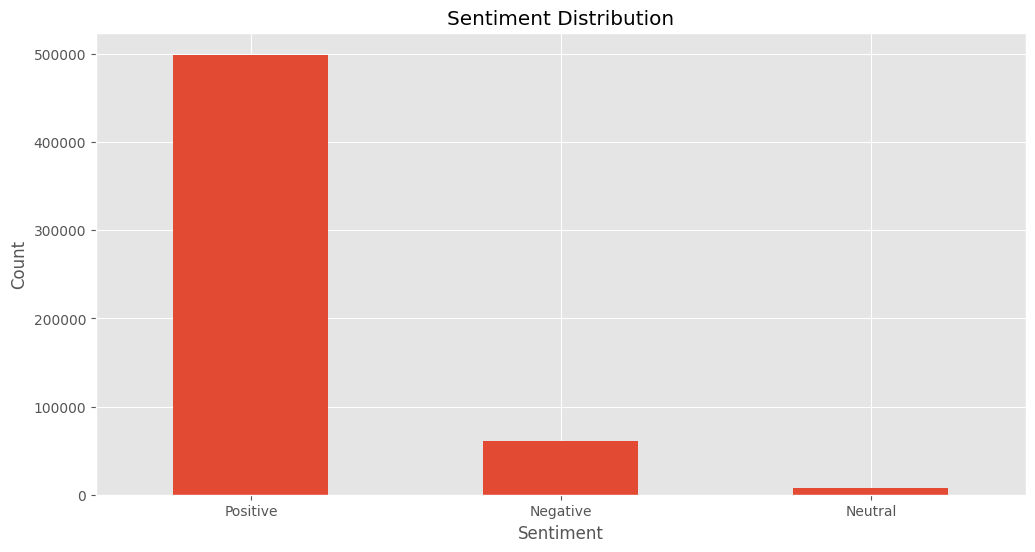

In [44]:
ax = df['Sentiment'].value_counts().plot(kind='bar', figsize=(12,6))
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Sentiment Distribution')
ax.set_xticklabels(['Positive', 'Negative', 'Neutral'], rotation=0)
plt.show()




C:\Users\Checkout\AppData\Local\Temp\ipykernel_10192\2017555403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Score', y='pos', ax=ax[0], palette='viridis')
C:\Users\Checkout\AppData\Local\Temp\ipykernel_10192\2017555403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Score', y='neu', ax=ax[1], palette='viridis')
C:\Users\Checkout\AppData\Local\Temp\ipykernel_10192\2017555403.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Score', y='neg', ax=ax[2], palette='viridis')


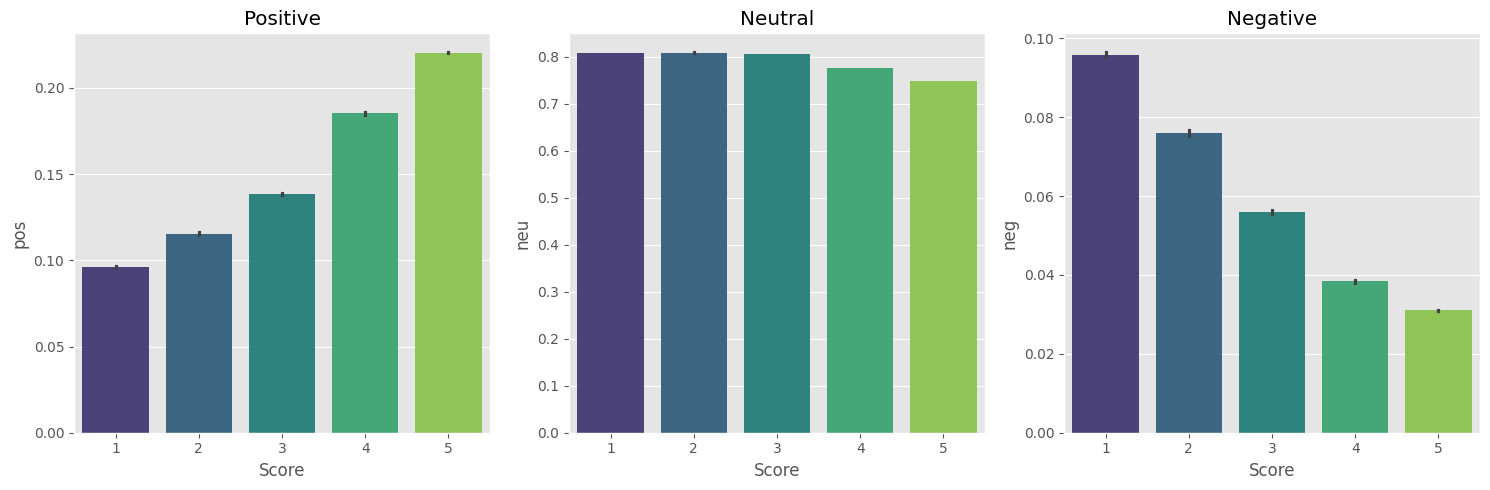

In [45]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=df, x='Score', y='pos', ax=ax[0], palette='viridis')
sns.barplot(data=df, x='Score', y='neu', ax=ax[1], palette='viridis')
sns.barplot(data=df, x='Score', y='neg', ax=ax[2], palette='viridis')
ax[0].set_title('Positive')
ax[1].set_title('Neutral')
ax[2].set_title('Negative')
plt.tight_layout()
plt.show()

Step 3) Roberta pre-trained model

In [46]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [47]:
model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model)
model  =  AutoModelForSequenceClassification.from_pretrained(model)

In [49]:
# VADER results on example
print(example)
sia.polarity_scores(example)


This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [51]:
# Run for Roberta Model
encoded_text =tokenizer(example, return_tensors='pt')
encoded_text

{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

In [62]:
# Running the model
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : float(scores[0]),
    'roberta_neu' : float(scores[1]),
    'roberta_pos' : float(scores[2])
}
print(scores_dict)

{'roberta_neg': 0.9763551354408264, 'roberta_neu': 0.020687466487288475, 'roberta_pos': 0.002957369200885296}


In [63]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : float(scores[0]),
        'roberta_neu' : float(scores[1]),
        'roberta_pos' : float(scores[2])
    }
    return scores_dict

In [64]:
# Testing for one row of the 500 dataframe
sample_text = df500.iloc[0]['Text']  # Change index 0 to any row you want to test

# Compute Vader sentiment scores
vader_result = pd.Series({f"vader_{k}": v for k, v in sia.polarity_scores(sample_text).items()})

# Compute RoBERTa sentiment scores
roberta_result = pd.Series(polarity_scores_roberta(sample_text))

# Combine results
sample_result = pd.concat([vader_result, roberta_result])

# Display the result
print(sample_result)


vader_neg         0.000000
vader_neu         0.695000
vader_pos         0.305000
vader_compound    0.944100
roberta_neg       0.009624
roberta_neu       0.049980
roberta_pos       0.940395
dtype: float64


In [65]:
#Running on the whole 500 rows
# Apply Vader sentiment analysis
vader_df = df500['Text'].apply(lambda x: pd.Series({f"vader_{k}": v for k, v in sia.polarity_scores(x).items()}))

# Apply RoBERTa sentiment analysis
roberta_df = df500['Text'].apply(lambda x: pd.Series(polarity_scores_roberta(x)))

# Combine both results with the original dataframe
df500 = pd.concat([df500, vader_df, roberta_df], axis=1)

# Display the result
print(df500)

RuntimeError: The expanded size of the tensor (571) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 571].  Tensor sizes: [1, 514]

In [67]:
#Resolved the Runtime Error
# Function to process a single text entry with error handling
def process_sentiment(text):
    try:
        # Compute Vader sentiment scores
        vader_scores = {f"vader_{k}": v for k, v in sia.polarity_scores(text).items()}
        
        # Compute RoBERTa sentiment scores
        roberta_scores = polarity_scores_roberta(text)
        
        # Combine both results
        return pd.Series({**vader_scores, **roberta_scores})
    
    except RuntimeError:
        print(f"Runtime error encountered for text: {text}")
        return pd.Series({f"vader_{k}": None for k in ['neg', 'neu', 'pos', 'compound']} |
                         {k: None for k in ['roberta_neg', 'roberta_neu', 'roberta_pos']})  # Adjust keys based on output format


sentiment_df = df500['Text'].apply(process_sentiment)

# Combine results with original dataframe
df500 = pd.concat([df500, sentiment_df], axis=1)

# Display the result
print(df500)

Runtime error encountered for text: I know the product title says Molecular Gastronomy, but don't let that scare you off.  I have been looking for this for a while now, not for food science, but for something more down to earth.  I use it to make my own coffee creamer.<br /><br />I have to have my coffee blonde and sweet - but the flavored creamers are full of the bad kinds of fat, and honestly, I hate to use manufactured "food" items.  I really don't think they are good for the body.  On the other hand, I hate using cold milk or cream, because I like HOT coffee.<br /><br />I stumbled across this on Amazon one day and got the idea of making my own creamer.  I also bought low-fat (non-instant) milk powder and regular milk powder. The non-instant lowfat milk is a little sweeter and tastes fresher than regular instant low-fat milk, but does not dissolve good in cold water - which is not a problem for hot coffee.  You will have to play with the ratios - I would not do just the heavy cream,

In [68]:
df500.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.0,0.695,0.305,0.9441,0.009624,0.04998,0.940395


C:\Users\Checkout\AppData\Local\Temp\ipykernel_10192\2196146378.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df500, x='Score', y='roberta_pos', ax=ax[0], palette='viridis')
C:\Users\Checkout\AppData\Local\Temp\ipykernel_10192\2196146378.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df500, x='Score', y='roberta_neu', ax=ax[1], palette='viridis')
C:\Users\Checkout\AppData\Local\Temp\ipykernel_10192\2196146378.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df500, x='Score', y='roberta_neg', ax=ax[2], palette='vi

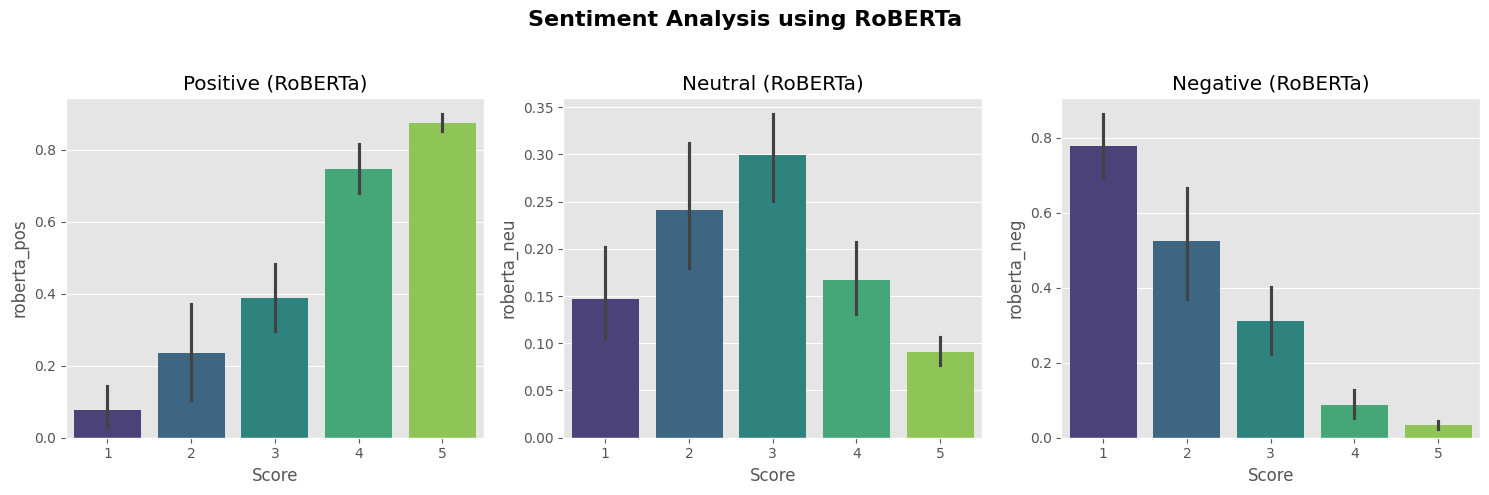

In [107]:
# Create subplots for RoBERTa sentiment scores
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plotting RoBERTa sentiment scores
sns.barplot(data=df500, x='Score', y='roberta_pos', ax=ax[0], palette='viridis')
sns.barplot(data=df500, x='Score', y='roberta_neu', ax=ax[1], palette='viridis')
sns.barplot(data=df500, x='Score', y='roberta_neg', ax=ax[2], palette='viridis')

# Setting individual subplot titles
ax[0].set_title('Positive (RoBERTa)')
ax[1].set_title('Neutral (RoBERTa)')
ax[2].set_title('Negative (RoBERTa)')

# Setting the main title for the entire figure
fig.suptitle('Sentiment Analysis using RoBERTa', fontsize=16, fontweight='bold')

# Layout adjustments
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to fit main title properly
plt.show()

### Step 4) Compare Scores between VADER and RoBERTA Models

In [69]:
df500.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg',
       'roberta_neu', 'roberta_pos'],
      dtype='object')

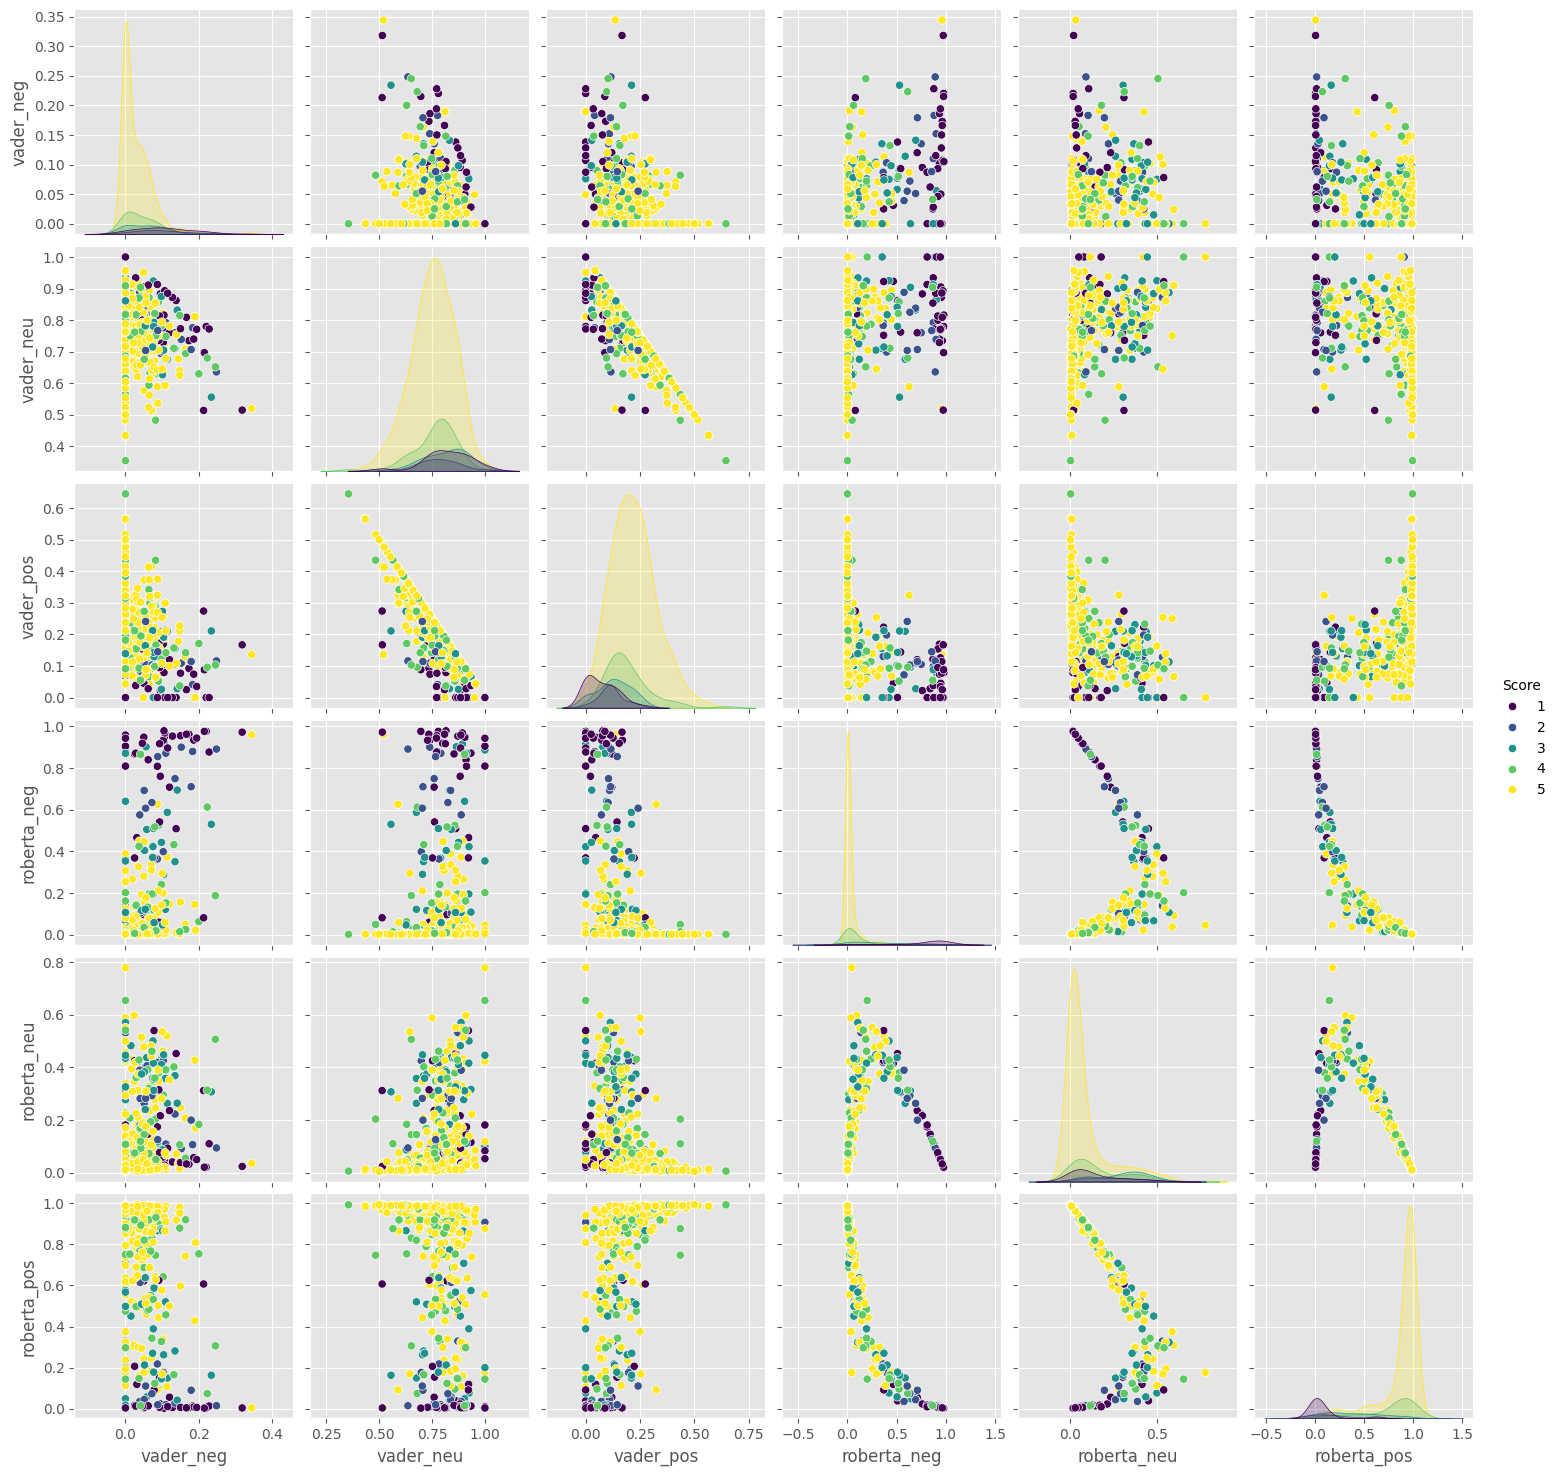

In [72]:
sns.pairplot(data = df500, 
             vars = ['vader_neg', 'vader_neu', 'vader_pos', 
             'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue = 'Score',
             palette = 'viridis')
plt.show()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      568454 non-null  int64  
 1   ProductId               568454 non-null  object 
 2   UserId                  568454 non-null  object 
 3   ProfileName             568428 non-null  object 
 4   HelpfulnessNumerator    568454 non-null  int64  
 5   HelpfulnessDenominator  568454 non-null  int64  
 6   Score                   568454 non-null  int64  
 7   Time                    568454 non-null  int64  
 8   Summary                 568427 non-null  object 
 9   Text                    568454 non-null  object 
 10  neg                     568454 non-null  float64
 11  neu                     568454 non-null  float64
 12  pos                     568454 non-null  float64
 13  compound                568454 non-null  float64
 14  Sentiment           

In [75]:
# Running the same thing for the entire dataframe
sentiment_df = df['Text'].apply(process_sentiment)

# Combine results with original dataframe
df = pd.concat([df, sentiment_df], axis=1)

df.head(1)

Runtime error encountered for text: I know the product title says Molecular Gastronomy, but don't let that scare you off.  I have been looking for this for a while now, not for food science, but for something more down to earth.  I use it to make my own coffee creamer.<br /><br />I have to have my coffee blonde and sweet - but the flavored creamers are full of the bad kinds of fat, and honestly, I hate to use manufactured "food" items.  I really don't think they are good for the body.  On the other hand, I hate using cold milk or cream, because I like HOT coffee.<br /><br />I stumbled across this on Amazon one day and got the idea of making my own creamer.  I also bought low-fat (non-instant) milk powder and regular milk powder. The non-instant lowfat milk is a little sweeter and tastes fresher than regular instant low-fat milk, but does not dissolve good in cold water - which is not a problem for hot coffee.  You will have to play with the ratios - I would not do just the heavy cream,

IndexError: index out of range in self

In [ ]:
#Plotting the graph for the entire dataframe
sns.pairplot(data = df, 
             vars = ['vader_neg', 'vader_neu', 'vader_pos', 
             'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue = 'Score',
             palette = 'viridis')
plt.show()

### Step 5) Review Examples
- Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [79]:
df500.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg',
       'roberta_neu', 'roberta_pos'],
      dtype='object')

In [77]:
# Positive Sentiment with 1 Star Review
df500.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [82]:
df500.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [83]:
# Negative Sentiment with 5 Star Review
df500.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [84]:
df500.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

### Step 6) Model Evaluation
Since dataset contains ratings (1-5 stars), using them to assign true sentiment labels:
- 1-2 stars → Negative
- 3 stars → Neutral
- 4-5 stars → Positive

Adding these labels to dataset:

In [85]:
# Evaluating the model performance

# Define ground truth sentiment based on ratings
def assign_sentiment(rating):
    if rating <= 2:
        return "negative"
    elif rating == 3:
        return "neutral"
    else:
        return "positive"

df500['true_sentiment'] = df500['Score'].apply(assign_sentiment)

In [98]:
df500.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,true_sentiment,vader_sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.0,0.695,0.305,0.9441,0.009624,0.04998,0.940395,positive,positive


In [94]:
df500['vader_sentiment'] = df500['vader_compound'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

### Evaluate VADER Performance

VADER Accuracy: 0.83
VADER Classification Report:
              precision    recall  f1-score   support

    negative       0.52      0.46      0.49        54
     neutral       0.23      0.08      0.12        37
    positive       0.88      0.94      0.91       409

    accuracy                           0.83       500
   macro avg       0.54      0.50      0.51       500
weighted avg       0.79      0.83      0.81       500



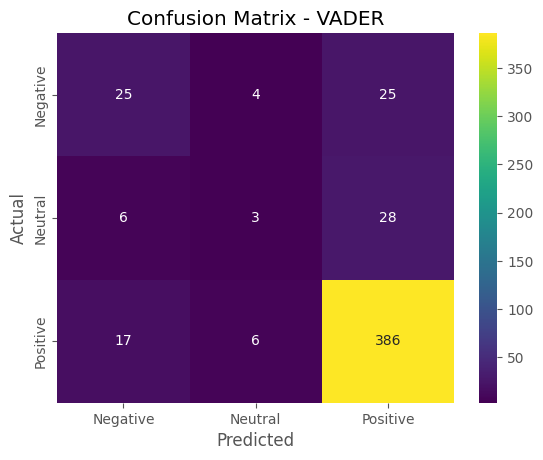

In [104]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy Score
vader_accuracy = accuracy_score(df500['true_sentiment'], df500['vader_sentiment'])
print(f"VADER Accuracy: {vader_accuracy:.2f}")

# Classification Report
print("VADER Classification Report:")
print(classification_report(df500['true_sentiment'], df500['vader_sentiment']))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_vader = confusion_matrix(df500['true_sentiment'], df500['vader_sentiment'], labels=["negative", "neutral", "positive"])
sns.heatmap(cm_vader, annot=True, fmt='d', cmap='viridis', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - VADER")
plt.show()


In [99]:
# Function to determine sentiment based on the highest probability
def get_roberta_sentiment(row):
    sentiments = ['negative', 'neutral', 'positive']
    return sentiments[np.argmax([row['roberta_neg'], row['roberta_neu'], row['roberta_pos']])]

# Apply function to each row
df500['roberta_sentiment'] = df500.apply(get_roberta_sentiment, axis=1)

In [100]:
print(df500[['roberta_neg', 'roberta_neu', 'roberta_pos', 'roberta_sentiment']].head(10))

   roberta_neg  roberta_neu  roberta_pos roberta_sentiment
0     0.009624     0.049980     0.940395          positive
1     0.508986     0.452414     0.038600          negative
2     0.003229     0.098067     0.898704          positive
3     0.002295     0.090219     0.907486          positive
4     0.001635     0.010302     0.988063          positive
5     0.006130     0.021796     0.972075          positive
6     0.001305     0.007774     0.990921          positive
7     0.002029     0.005685     0.992285          positive
8     0.003874     0.094156     0.901970          positive
9     0.003103     0.055912     0.940984          positive


### Evaluate RoBERTA Performance

RoBERTa Accuracy: 0.85
RoBERTa Classification Report:
              precision    recall  f1-score   support

    negative       0.64      0.78      0.70        54
     neutral       0.23      0.22      0.22        37
    positive       0.94      0.92      0.93       409

    accuracy                           0.85       500
   macro avg       0.60      0.64      0.62       500
weighted avg       0.86      0.85      0.85       500



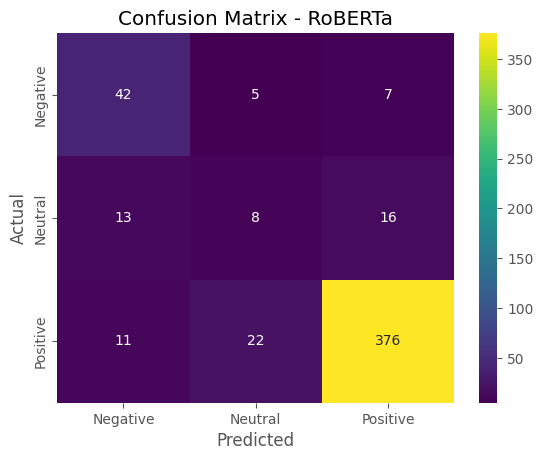

In [103]:
# Accuracy Score
roberta_accuracy = accuracy_score(df500['true_sentiment'], df500['roberta_sentiment'])
print(f"RoBERTa Accuracy: {roberta_accuracy:.2f}")

# Classification Report
print("RoBERTa Classification Report:")
print(classification_report(df500['true_sentiment'], df500['roberta_sentiment']))

# Confusion Matrix
cm_roberta = confusion_matrix(df500['true_sentiment'], df500['roberta_sentiment'], labels=["negative", "neutral", "positive"])
sns.heatmap(cm_roberta, annot=True, fmt='d', cmap='viridis', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RoBERTa")
plt.show()